# NEM DATA CHALLENGE
## Data Analysis Code 

In [1]:
%matplotlib notebook
import os
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-notebook')
#plt.style.use('ggplot')
#mystyle()

In [3]:
def read_csv_file():
    ''' read dataset10Min.csv'''

    in_path  = (r'.\OUTPUT')
    in_file = 'datasets10Min.csv'
    in_csv = os.path.join(in_path,in_file)
    df = pd.read_csv(in_csv)
    indx =df.datetime[df.datetime==1433116800].index # index positions where datetime= 1433116800
    df.loc[indx,'datetime']=1433116800-1 # subtract one second to avoid date 01-06-2015
    df['datetime'] = pd.to_datetime(df['datetime'], unit='s')
    df.set_index('datetime', drop=True, inplace=True)
    df = df[sensor_list()] # reorder columns according to sensor list
    df1 = df[df.asset=='A001']
    df2 = df[df.asset=='A002']
    df3 = df[df.asset=='A003']
    df4 = df[df.asset=='A004']
    df5 = df[df.asset=='A005']
    return df,df1,df2,df3,df4,df5   

In [4]:
def sensor_list():
        NAC = ['WNACWindSpeed','WNACDirection','WNACWindDirection',
               'WNACAmbTemp','WNACNacelleTemp']
        GEN = ['WGENPhase1Temp','WGENPhase2Temp','WGENPhase3Temp',
               'WGENGenSpeed','WGENBearNDETemp','WGENBearDETemp']
        ROT = ['WROTPitchAngleSP','WROTSpeed','WROTPitchAngleAvg']
        GDC = ['WGDCTrafoPhase1Temp','WGDCTrafoPhase2Temp','WGDCTrafoPhase3Temp']
        TUR = ['WTURReactivePower','WTURReactivePowerAux','WTURPowerAux','WTURPower']
        HDR = ['WHDRGroupOilPress','WHDRGroupOilTemp']
        TRM = ['WTRMOilTemp','WTRMBearTemp'] 
        YAW = ['WYAWPressure']
        CNV = ['WCNVCosPhi','WCNVNetVoltage']
        cols = NAC+GEN+ROT+GDC+TUR+HDR+TRM+YAW+CNV+['asset']
        return cols
    

In [5]:
cwd = r'C:\Home00Ser\Python\NEM Challenge\datasets'
os.chdir(cwd)
dfall,df1,df2,df3,df4,df5 = read_csv_file()
df6 = dfall.groupby(dfall.index).mean()

In [6]:
# Generate dataframe resample per DAY
dfD = dfall.groupby('asset').resample('D').sum()
dfD = dfD.reset_index(level=['asset'])
dfD1 = dfD[dfD.asset=='A001']
dfD2 = dfD[dfD.asset=='A002']
dfD3 = dfD[dfD.asset=='A003']
dfD4 = dfD[dfD.asset=='A004']
dfD5 = dfD[dfD.asset=='A005']
dfD6 = dfD.groupby(dfD.index).mean()

In [7]:
# Monthly dataframe
dfM = dfall.groupby('asset').resample('M').sum()
dfM = dfM.reset_index(level=['asset'])
dfM1 = dfM[dfM.asset=='A001']
dfM2 = dfM[dfM.asset=='A002']
dfM3 = dfM[dfM.asset=='A003']
dfM4 = dfM[dfM.asset=='A004']
dfM5 = dfM[dfM.asset=='A005']
dfM6 = dfM.groupby(dfM.index).mean()

In [8]:
NAC = ['WNACWindSpeed','WNACDirection','WNACWindDirection','WNACAmbTemp','WNACNacelleTemp']
GEN = ['WGENPhase1Temp','WGENPhase2Temp','WGENPhase3Temp',
        'WGENGenSpeed','WGENBearNDETemp','WGENBearDETemp']
ROT = ['WROTPitchAngleSP','WROTSpeed','WROTPitchAngleAvg']
GDC = ['WGDCTrafoPhase1Temp','WGDCTrafoPhase2Temp','WGDCTrafoPhase3Temp']
TUR = ['WTURReactivePower','WTURReactivePowerAux','WTURPowerAux','WTURPower']
HDR = ['WHDRGroupOilPress','WHDRGroupOilTemp']
TRM = ['WTRMOilTemp','WTRMBearTemp']
YAW = ['WYAWPressure']
CNV = ['WCNVCosPhi','WCNVNetVoltage']
ALL = NAC+GEN+ROT+GDC+TUR+HDR+TRM+YAW+CNV
ALL2 = NAC+GEN+ROT+GDC+TUR+HDR+TRM+YAW+['asset']
LIS = ['WNACWindSpeed','WTURPower','WROTSpeed']
ASS = ['asset']

In [16]:
dfall

,WNACWindSpeed,WNACDirection,WNACWindDirection,WNACAmbTemp,WNACNacelleTemp,WGENPhase1Temp,WGENPhase2Temp,WGENPhase3Temp,WGENGenSpeed,WGENBearNDETemp,...,WTURPowerAux,WTURPower,WHDRGroupOilPress,WHDRGroupOilTemp,WTRMOilTemp,WTRMBearTemp,WYAWPressure,WCNVCosPhi,WCNVNetVoltage,asset
datetime,,,,,,,,,,,,,,,,,,,,,
2015-05-01 00:10:00,0.232705,0.632365,0.034610,0.352273,0.564973,0.670345,0.678605,0.678450,0.925665,0.575171,...,-0.006425,0.484594,0.946188,0.499482,0.734519,0.804736,0.968385,0.987495,62.760000,A001
2015-05-01 00:20:00,0.240519,0.636720,-0.193071,0.348559,0.562886,0.665521,0.674164,0.673801,0.929502,0.580992,...,-0.006494,0.499054,0.947391,0.500185,0.726352,0.797588,1.006540,0.988017,62.814865,A001
2015-05-01 00:30:00,0.236233,0.636720,-0.063975,0.345775,0.563298,0.662782,0.671611,0.670917,0.932675,0.583763,...,-0.006485,0.498477,0.945406,0.501745,0.720991,0.794025,1.006919,0.988010,62.831740,A001
2015-05-01 00:40:00,0.240962,0.636720,-0.217021,0.343308,0.558239,0.666791,0.675750,0.675346,0.932404,0.584794,...,-0.006270,0.500386,0.946720,0.501841,0.721356,0.794318,1.007420,0.988437,62.902396,A001
2015-05-01 00:50:00,0.228353,0.636720,-0.159086,0.340779,0.571563,0.658676,0.667582,0.667434,0.902527,0.585500,...,-0.005621,0.429755,0.946798,0.502408,0.738411,0.791293,1.007043,0.985260,62.843958,A001
2015-05-01 01:00:00,0.243886,0.626815,-0.102420,0.343089,0.565492,0.658395,0.667339,0.666993,0.936153,0.584819,...,-0.006215,0.541194,0.949098,0.501199,0.745333,0.798656,0.969363,0.989713,62.718656,A001
2015-05-01 01:10:00,0.256072,0.632886,-0.000300,0.342769,0.555453,0.672140,0.680786,0.680607,0.955589,0.584990,...,-0.006579,0.622016,0.950024,0.501477,0.736276,0.804435,0.949568,0.992758,62.546469,A001
2015-05-01 01:20:00,0.264071,0.635254,-0.072638,0.339114,0.549729,0.684996,0.693518,0.693381,0.957790,0.587155,...,-0.006807,0.657989,0.944836,0.501490,0.734623,0.805151,0.944370,0.993795,62.576073,A001
2015-05-01 01:30:00,0.247052,0.608510,0.184530,0.336033,0.551172,0.688212,0.696775,0.696629,0.947210,0.590754,...,-0.006369,0.565881,0.948360,0.502600,0.731087,0.802182,1.005361,0.991575,62.535969,A001


### SCATTER MATRIX

<IPython.core.display.Javascript object>


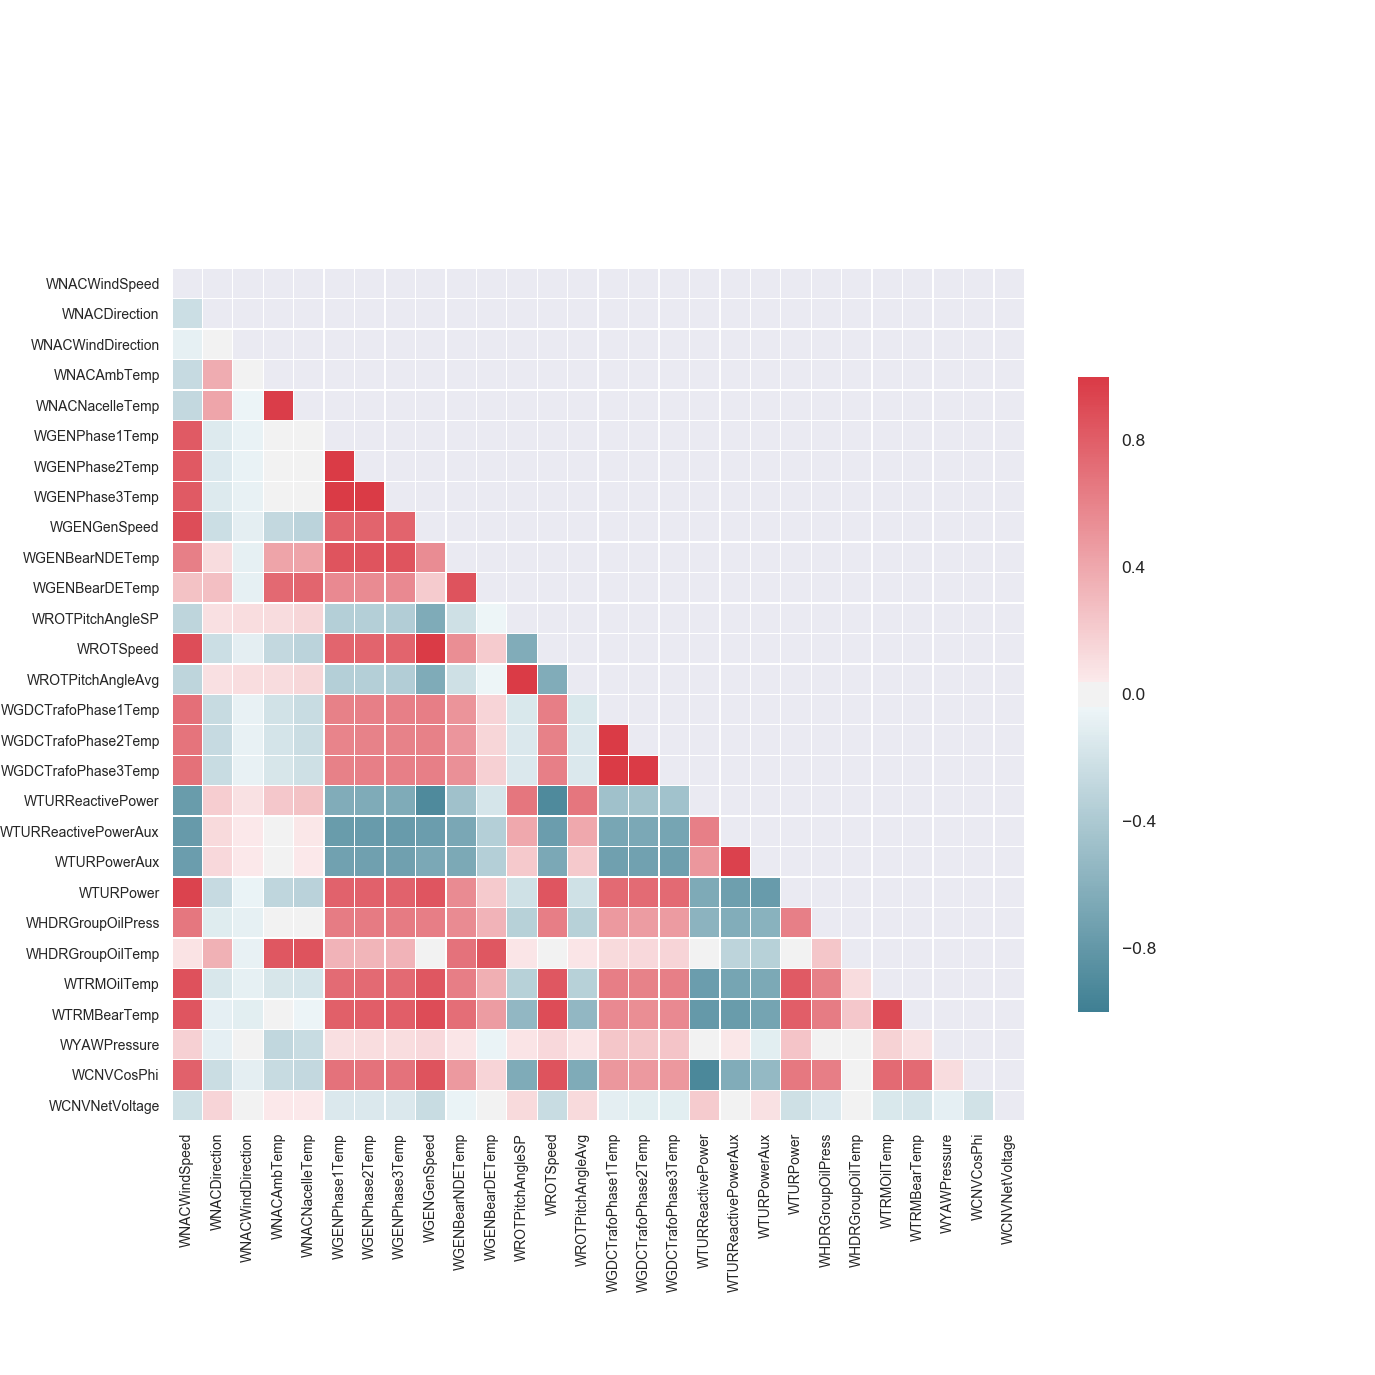

In [10]:
#kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
#      'ytick.major.size': 2, 'xtick.major.size': 2, 'axes.labelcolor': '0'}

#sns.set_style("whitegrid", kw)

# Compute the correlation matrix
df6=df6[ALL]
corr = df6.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, n=20, as_cmap=True)
cmap = sns.diverging_palette(220, 10, n=10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=0, vmax=1,
            square=True, linewidths=.2, cbar_kws={"shrink": .6})

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_rotation(90)
    label.set_fontsize(8)
for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_rotation(0)
    label.set_fontsize(8) 

#sfig('correla20')

## Power Curve Assessment every 10 min

<IPython.core.display.Javascript object>


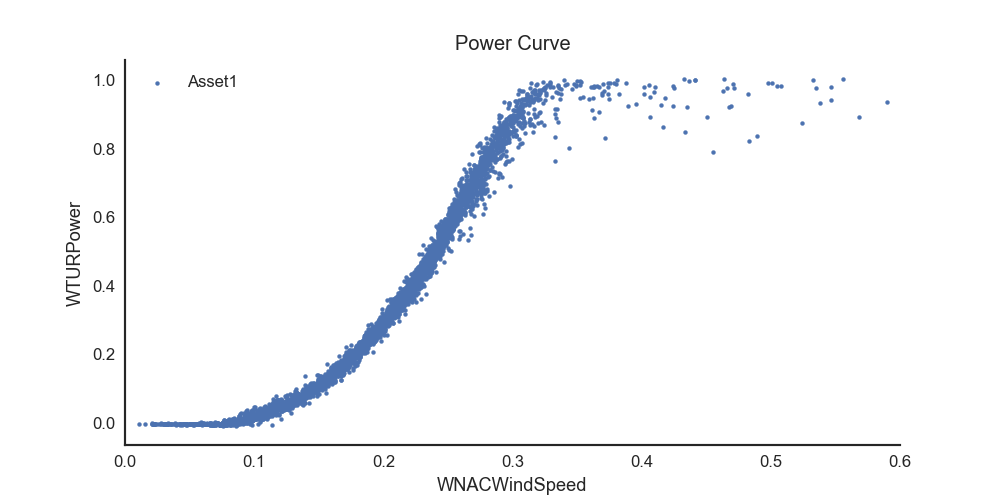

In [58]:
fig, ax = plt.subplots( sharex=True, sharey=True,figsize=(8,4) )
x ='WNACWindSpeed'
y ='WTURPower'
df1.plot.scatter(x,y, ax=ax, marker ='.', label='Asset1');
ax.set_title('Power Curve');
ax.set_xlim(0, .6);

<IPython.core.display.Javascript object>


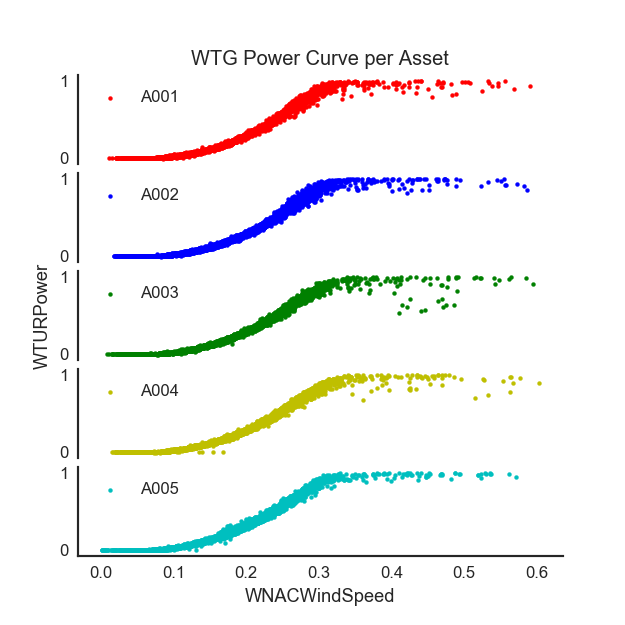

In [59]:
mystyle()
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, sharey=True,figsize=(5,5) )
x ='WNACWindSpeed'
Y ='WTURPower'
ax1.set_title('WTG Power Curve per Asset')
df1.plot.scatter(x, y, c='r', ax=ax1, marker ='.', label = 'A001')
df2.plot.scatter(x, y, c='b', ax=ax2, marker ='.', label = 'A002')
df3.plot.scatter(x, y, c='g', ax=ax3, marker ='.', label = 'A003')
df4.plot.scatter(x, y, c='y', ax=ax4, marker ='.', label = 'A004')
df5.plot.scatter(x, y, c='c', ax=ax5, marker ='.', label = 'A005');
plt.subplots_adjust(hspace = .1)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
# remove spines
ax1.spines['bottom'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax4.spines['bottom'].set_color('none') 

ax1.yaxis.set_ticks_position('left') 
ax2.yaxis.set_ticks_position('left')
ax3.yaxis.set_ticks_position('left')
ax4.yaxis.set_ticks_position('left')
ax5.yaxis.set_ticks_position('left')
;
#sfig('Pwrcurve')

## Active vs Reactive Power Curve

<IPython.core.display.Javascript object>


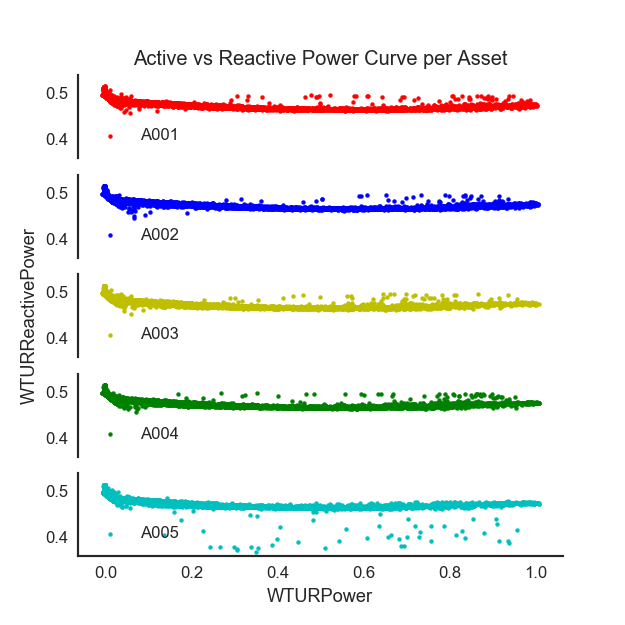

In [60]:
mystyle()
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(5,5) )
y= 'WTURReactivePower'
x= 'WTURPower'
df1.plot.scatter(x, y, color ='r', marker ='.', ax=ax1, label='A001');
df2.plot.scatter(x, y, color ='b', marker ='.', ax=ax2, label='A002');
df3.plot.scatter(x, y, color ='y', marker ='.', ax=ax3, label='A003');
df4.plot.scatter(x, y, color ='g', marker ='.', ax=ax4, label='A004');
df5.plot.scatter(x, y, color ='c', marker ='.', ax=ax5, label='A005');
ax1.set_title('Active vs Reactive Power Curve per Asset')
plt.subplots_adjust(wspace = .1)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')

# remove spines
ax1.spines['bottom'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax4.spines['bottom'].set_color('none') 

ax1.yaxis.set_ticks_position('left') 
ax2.yaxis.set_ticks_position('left')
ax3.yaxis.set_ticks_position('left')
ax4.yaxis.set_ticks_position('left')
ax5.yaxis.set_ticks_position('left')
;
sfig('ARPwrcurve')


### Wind Speed HIST

In [ ]:
col=['WNACWindSpeed']
df1[col].plot.hist(alpha=0.7, bins=100,figsize=(8,4));

### BOXPLOT GORUPBY ASSET

<IPython.core.display.Javascript object>


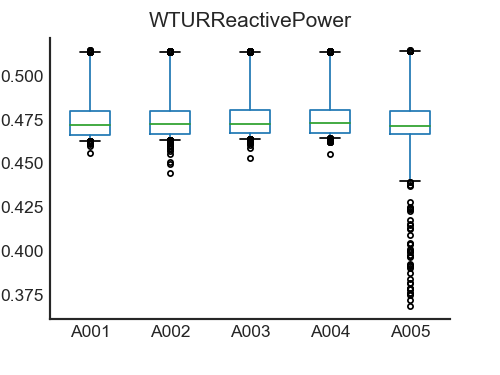

<IPython.core.display.Javascript object>


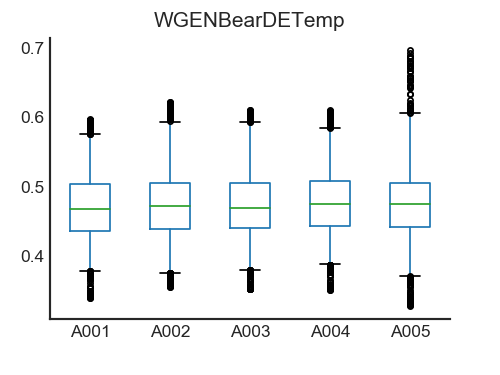

<IPython.core.display.Javascript object>


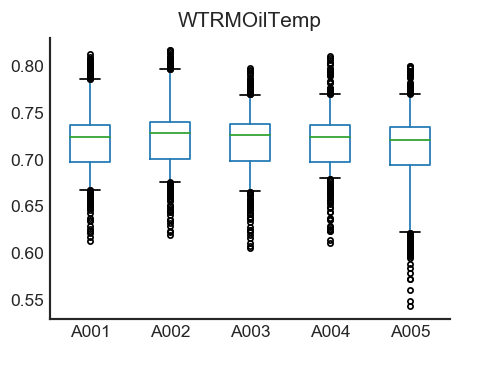

In [18]:

mystyle()
sensors = ['WTURReactivePower', 'WGENBearDETemp','WTRMOilTemp']
for sensor in sensors:
    fig, ax = plt.subplots( figsize=(4, 3))
    dfall[[sensor, 'asset']].boxplot(by='asset', ax=ax, whis=[1, 99], sym='.')
    ax.set_title(sensor)
    #ax.suptitle=''
    ax.set_xlabel('')
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    fig.suptitle('')
    #sfig('bp-'+sensor)

### WIND SPEED JOINTPLOT

In [ ]:
plt.style.use('seaborn')
a='WNACWindSpeed'
b='WTURPower'
sns.jointplot(a, b, df6, marker ='.');

## Wind Trubine Power Curve (dayly basis)

<IPython.core.display.Javascript object>


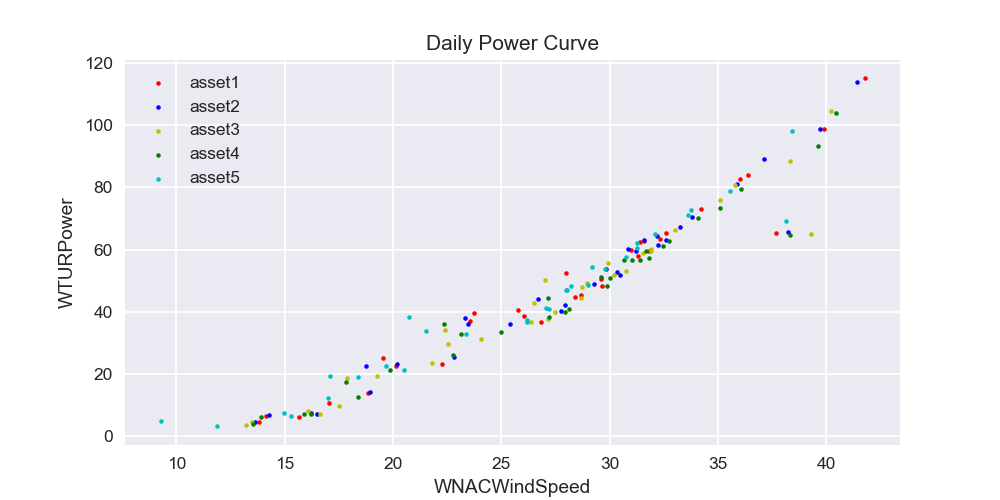

In [11]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(8,4) )
dfD1.plot.scatter('WNACWindSpeed', 'WTURPower', color ='r', marker ='.', ax=ax, label='asset1');
dfD2.plot.scatter('WNACWindSpeed', 'WTURPower', color ='b', marker ='.', ax=ax, label='asset2');
dfD3.plot.scatter('WNACWindSpeed', 'WTURPower', color ='y', marker ='.', ax=ax, label='asset3');
dfD4.plot.scatter('WNACWindSpeed', 'WTURPower', color ='g', marker ='.', ax=ax, label='asset4');
dfD5.plot.scatter('WNACWindSpeed', 'WTURPower', color ='c', marker ='.', ax=ax, label='asset5');
ax.set_title('Daily Power Curve');

## WindSpeed distribution per day.

<IPython.core.display.Javascript object>


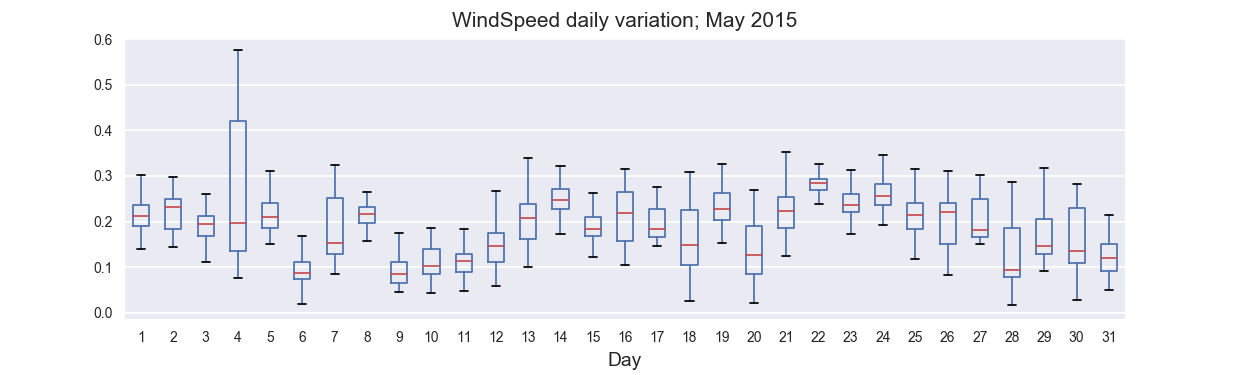

In [11]:
fig, ax = plt.subplots( figsize=(10, 3))
y = 'WNACWindSpeed'
df6.boxplot(y, by=df6.index.day, ax=ax, rot=0, fontsize=8)
ax.set_title('WindSpeed daily variation; May 2015')
fig.suptitle('')
ax.set_xlabel("Day")
#ax.yaxis.grid(False)
ax.xaxis.grid(False);
# sfig()

## Ambient temperature distribution per day.

<IPython.core.display.Javascript object>


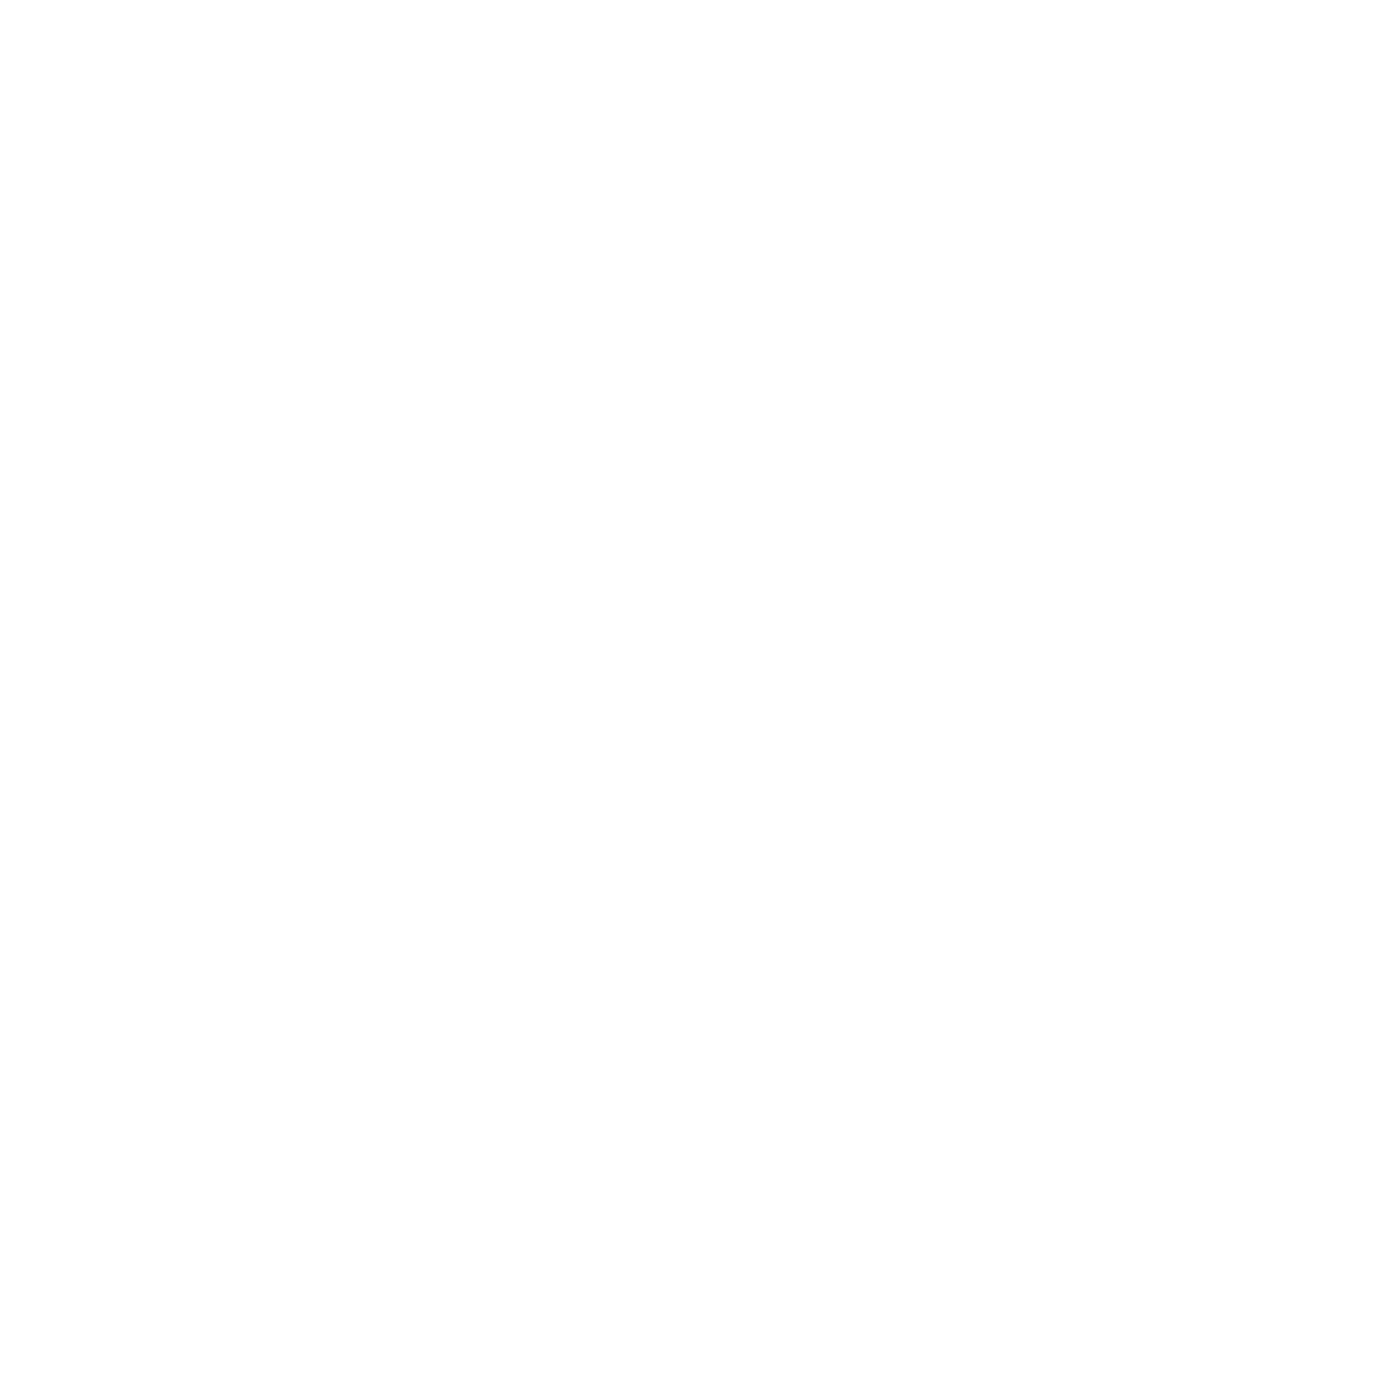

AttributeError: module 'seaborn' has no attribute 'corrplot'

In [12]:
# Compute the correlation matrix
corr = df6.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.corrplot(df6)

for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_rotation(90)
    label.set_fontsize(8)
for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_rotation(0)
    label.set_fontsize(8)  

<IPython.core.display.Javascript object>


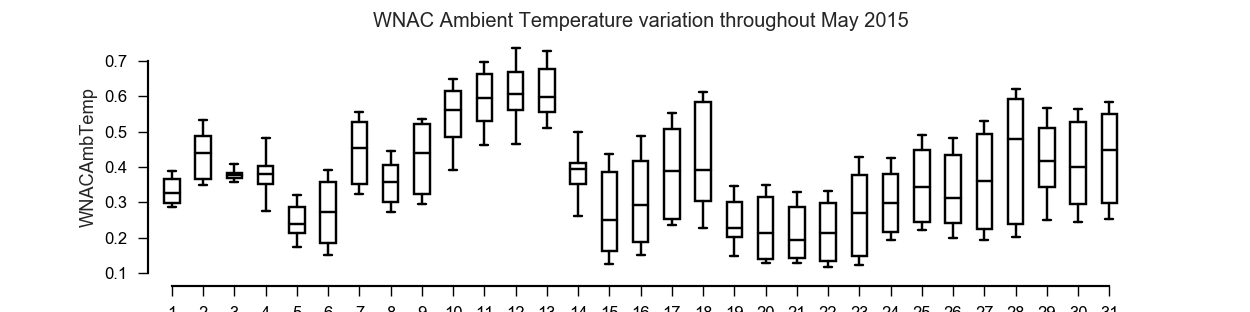

In [13]:
# figure styles
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)
sns.set_style('ticks', {'axes.edgecolor': '0', 'xtick.color': '0', 'ytick.color': '0'})
x = df6.index.day
y = df6.WNACAmbTemp
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 2.5))
sns.boxplot(x,y , ax=ax, color='white', width=.5,fliersize=0)
ax.set_title('WNAC Ambient Temperature variation throughout May 2015')
#ax.set_xlabel('Day in May 2015')
sns.despine(offset=5, trim=True)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k');
#sfig('TambVar')

<IPython.core.display.Javascript object>


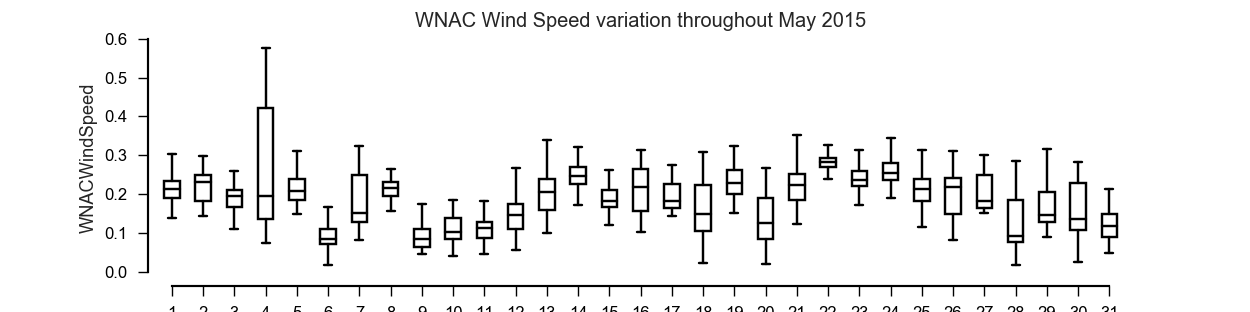

In [14]:
# figure styles
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)
sns.set_style('ticks', {'axes.edgecolor': '0', 'xtick.color': '0', 'ytick.color': '0'})
x = df6.index.day
y = df6.WNACWindSpeed
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 2.5))
sns.boxplot(x,y , ax=ax, color='white', width=.5,fliersize=0)
ax.set_title('WNAC Wind Speed variation throughout May 2015')
#ax.set_xlabel('Day in May 2015')
sns.despine(offset=5, trim=True)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k');
#sfig('WindVar')

In [ ]:
fig, ax = plt.subplots( figsize=(8, 3))
y = 'WNACAmbTemp'
df6.boxplot(y, by=df6.index.day, ax=ax, rot=0, fontsize=8)
ax.set_title('WNAC daily Ambient Temperature variation; May 2015')
fig.suptitle('')
ax.set_xlabel("Day");
sfig()

### Ambien and Nacelle Temperature

<IPython.core.display.Javascript object>


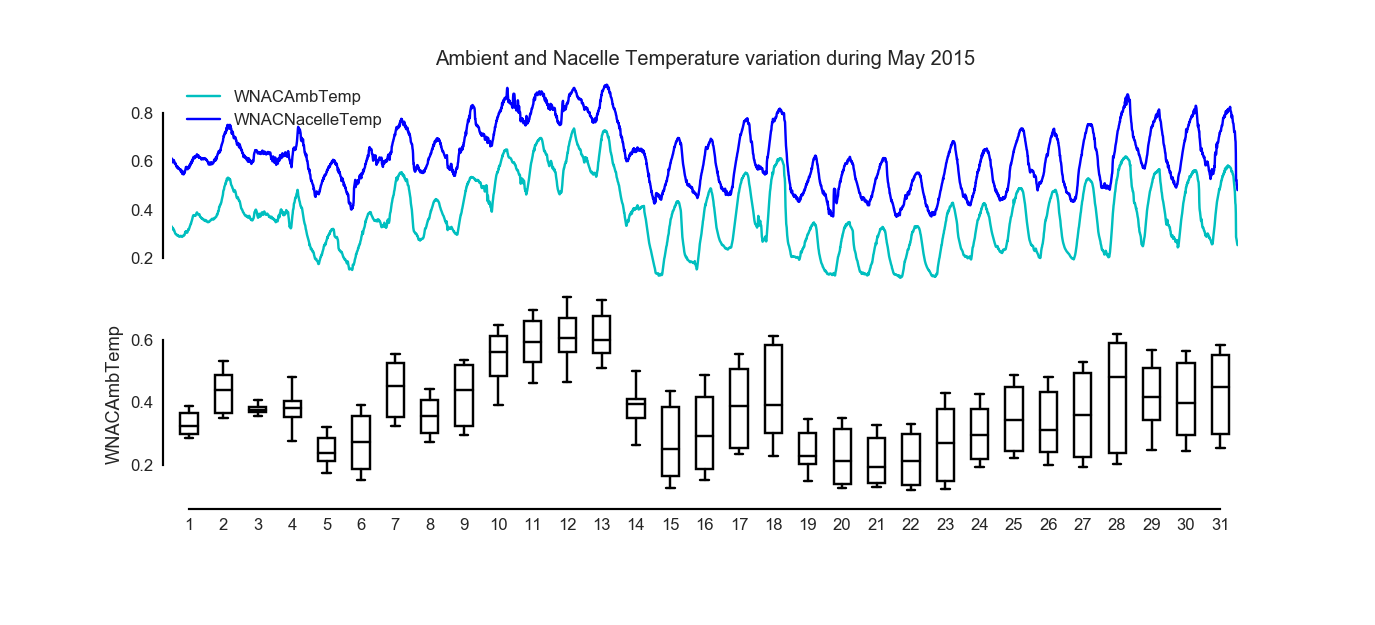

In [17]:
a = ['WNACAmbTemp']
b = ['WNACNacelleTemp']
df=df6

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,5))
plt.subplots_adjust(hspace = .001)

df.plot(x=df.index, y=a, color ='c', ax=ax1);
df.plot(x=df.index, y=b, color ='b', ax=ax1);
ax1.set_title('Ambient and Nacelle Temperature variation during May 2015');
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.spines['bottom'].set_color('none')

x = df.index.day
y = df6.WNACAmbTemp
sns.boxplot(x,y , ax=ax2, color='white', width=.5, fliersize=0)
ax2.set_title('')
ax2.set_xlabel('')



# figure styles
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)
#sns.set_style('ticks', {'axes.edgecolor': '0', 'xtick.color': '0', 'ytick.color': '0'})
sns.despine(offset=5, trim=True)
plt.setp(ax2.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax2.lines, color='k');

#sfig('TempVar')

## Wind turbine power generation per day.

<IPython.core.display.Javascript object>


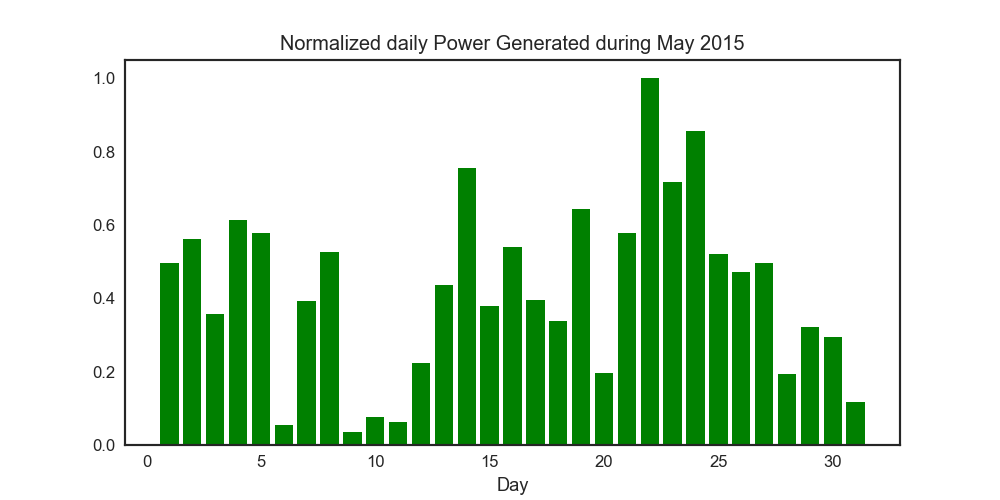

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
y = dfD6['WTURPower']/dfD6['WTURPower'].max()
x = dfD6.index.day
ax.bar(x, y , xerr=None, align='center',color='green', ecolor='black')
#ax.set_yticks(y)
#ax.set_yticklabels(people)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Day')
ax.set_title('Normalized daily Power Generated during May 2015');
#sfig()

<IPython.core.display.Javascript object>


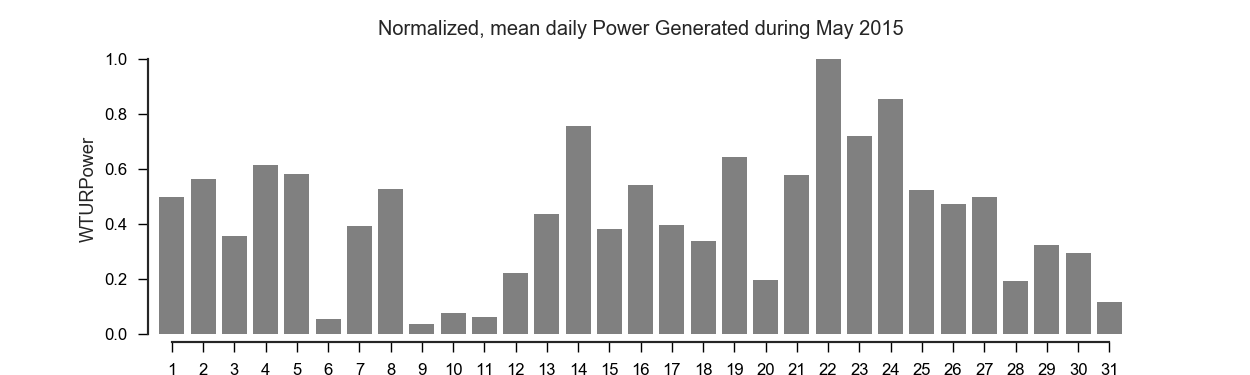

In [20]:
fig, ax = plt.subplots(figsize=(10, 3))
y = dfD6['WTURPower']/dfD6['WTURPower'].max()
x = dfD6.index.day
#ax.bar(x, y , xerr=None, align='center',color='green', ecolor='black')
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)
sns.set_style('ticks', {'axes.edgecolor': '0', 'xtick.color': '0', 'ytick.color': '0'})

sns.barplot(x=x, y=y, data=dfD6, color='grey')
ax.set_title('Normalized, mean daily Power Generated during May 2015');
ax.set_xlabel('')
ax.set_ylabel('WTURPower')
sns.despine(offset=5, trim=True)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k');
#sfig('DayPower')

### Wind and Power generated

<IPython.core.display.Javascript object>


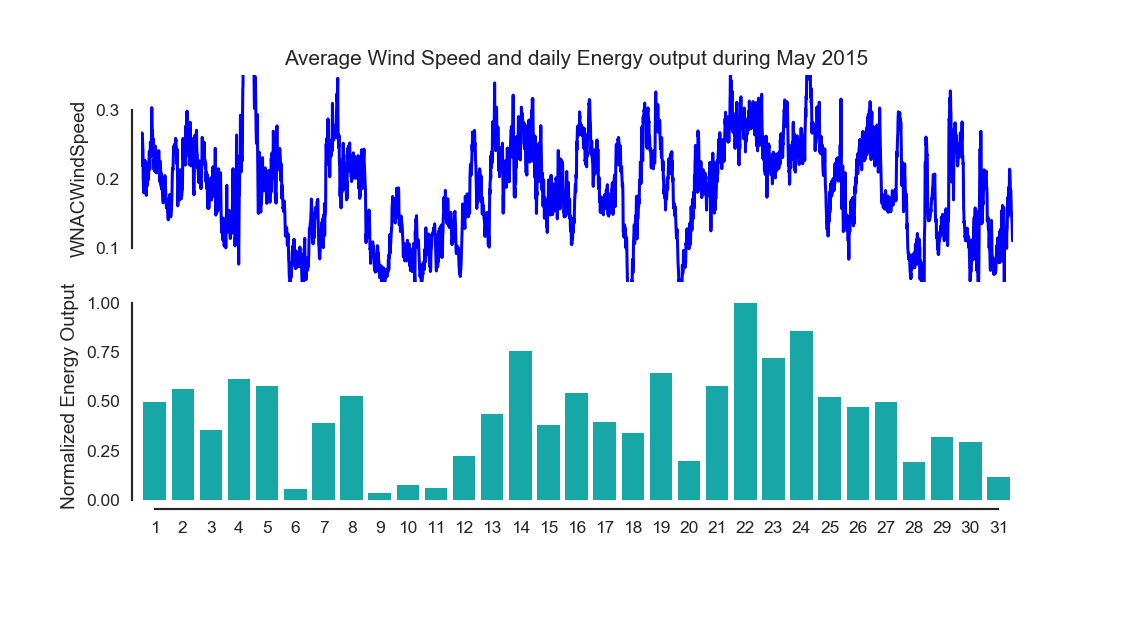

In [18]:
a = ['WNACWindSpeed']
df=df6

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,5))
plt.subplots_adjust(hspace = .05)

df.plot(x=df.index, y=a, color ='b', legend='', ax=ax1);
ax1.set_ylim([0.05,0.35])
ax1.set_title('Average Wind Speed and daily Energy output during May 2015');
ax1.set_ylabel('WNACWindSpeed')
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.spines['bottom'].set_color('none')

y = dfD6['WTURPower']/dfD6['WTURPower'].max()
x = dfD6.index.day
sns.set_style('white')
#sns.set_context('paper', font_scale=1.2)
#sns.set_style('ticks', {'axes.edgecolor': '0', 'xtick.color': '0', 'ytick.color': '0'})

sns.barplot(x=x, y=y, data=dfD6, color='c')
ax2.set_xlabel('')
ax2.set_ylabel('Normalized Energy Output')
sns.despine(offset=5, trim=True)
#plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
#plt.setp(ax.lines, color='k');
#sfig('DayPower')

<IPython.core.display.Javascript object>


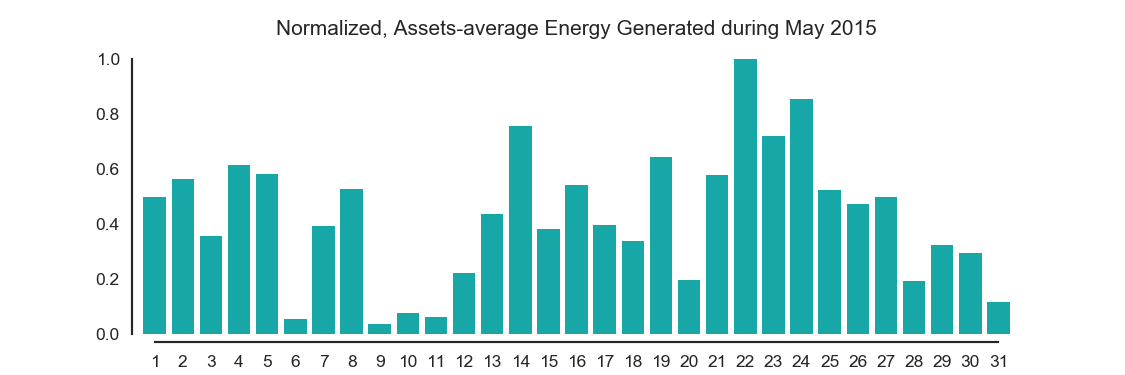

In [26]:
a = ['WNACWindSpeed']
df=df6

fig, (ax1) = plt.subplots(1, 1, figsize=(9,3))


y = dfD6['WTURPower']/dfD6['WTURPower'].max()
x = dfD6.index.day
sns.set_style('white')
#sns.set_context('paper', font_scale=1.2)
#sns.set_style('ticks', {'axes.edgecolor': '0', 'xtick.color': '0', 'ytick.color': '0'})

sns.barplot(x=x, y=y, data=dfD6, color='c')
ax1.set_title('Normalized, Assets-average Energy Generated during May 2015');
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(offset=5, trim=True)
#plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
#plt.setp(ax.lines, color='k');
sfig('DayPower')

<IPython.core.display.Javascript object>


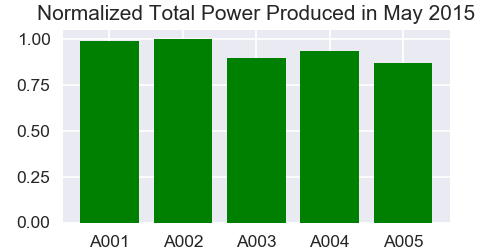

In [15]:
fig, ax = plt.subplots(figsize=(4, 2))
assets = dfM.asset.tolist()
x_pos = np.arange(len(assets))
y_hig = dfM['WTURPower']/dfM['WTURPower'].max()
ax.bar(x_pos, y_hig , xerr=None, align='center',color='green', ecolor='black')

#ax.set_yticks(y)

#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Asset')
ax.set_title('Normalized Total Power Produced in May 2015');
ax.set_xticks(x_pos)
ax.set_xticklabels(assets);
#sfig()

<IPython.core.display.Javascript object>


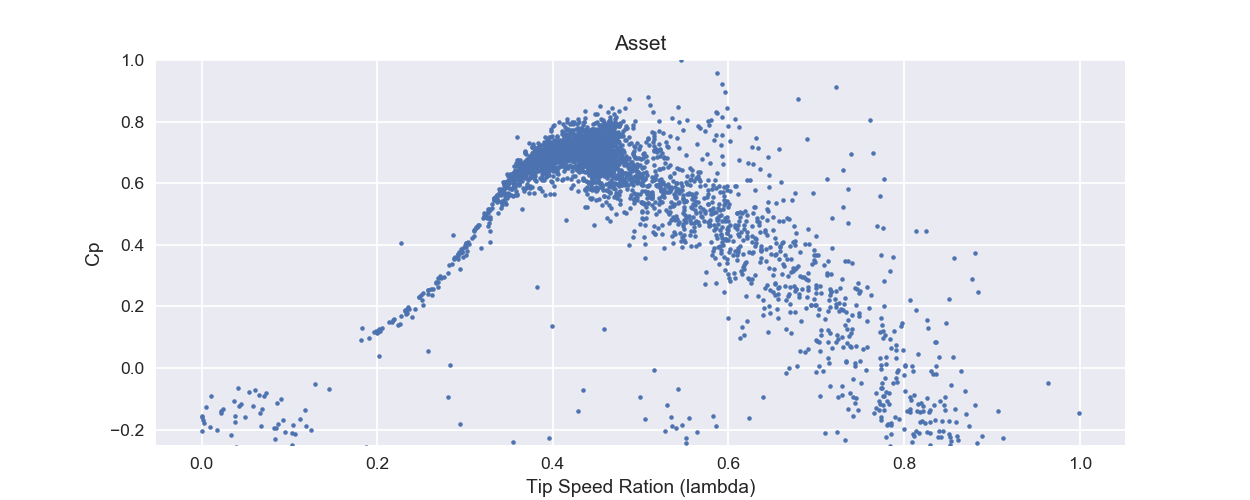

In [13]:
df=df1.copy()
df['Cp']=df['WTURPower']/(df['WNACWindSpeed']**3)
df['Cp']= df['Cp']/df['Cp'].max()
df['lambda']=df['WROTSpeed']/df['WNACWindSpeed']
df['lambda']= df['lambda']/df['lambda'].max()
L = 'lambda'
Ws = 'WNACWindSpeed'
Cp = 'Cp'
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(10,4) )
df.plot.scatter(L,Cp , ax=ax1, marker='.');
ax1.set_xlabel('Tip Speed Ration (lambda)')
#ax1.set_ylabel('WROTSpeed')
ax1.set_title('Asset')
ax1.set_ylim(-.25, 1);

In [14]:
def mystyle():
    plt.style.use('seaborn-white')
    plt.rcParams ['axes.grid']=False 
    plt.rcParams ['axes.spines.left']   = True   # display axis spines
    plt.rcParams ['axes.spines.bottom'] = True
    plt.rcParams ['axes.spines.top']    = False
    plt.rcParams ['axes.spines.right']  = False

In [25]:
def sfig(figname='myfig'):
    
    name = figname+'.png'
    path = r'C:\Home00Ser\Python\NEM Challenge\Report\Figs'
    fname = os.path.join(path,name)

    plt.savefig(fname, dpi=900, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches='tight', pad_inches=0.1,
            frameon=None) 